<a href="https://colab.research.google.com/github/space-owner/Deep-Learning/blob/main/Poisson%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#   Reference:
#       - https://scikit-learn.org/stable/auto_examples/linear_model/plot_poisson_regression_non_normal_loss.html

In [8]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = fetch_openml(data_id=41214, as_frame=True).frame
print('>>> data shape =', data.shape)
df

>>> data shape = (678013, 13)


,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1.0,0.10000,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82
1,3.0,1.0,0.77000,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82
2,5.0,1.0,0.75000,B,6.0,2.0,52.0,50.0,B12,Diesel,54.0,R22
3,10.0,1.0,0.09000,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72
4,11.0,1.0,0.84000,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72
...,...,...,...,...,...,...,...,...,...,...,...,...
678008,6114326.0,0.0,0.00274,E,4.0,0.0,54.0,50.0,B12,Regular,3317.0,R93
678009,6114327.0,0.0,0.00274,E,4.0,0.0,41.0,95.0,B12,Regular,9850.0,R11
678010,6114328.0,0.0,0.00274,D,6.0,2.0,45.0,50.0,B12,Diesel,1323.0,R82
678011,6114329.0,0.0,0.00274,B,4.0,0.0,60.0,50.0,B12,Regular,95.0,R26


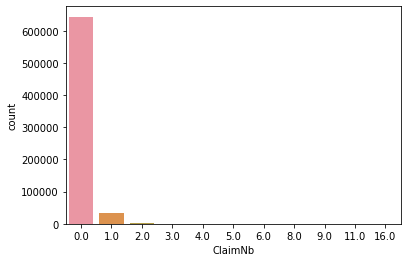

In [26]:
df['Frequency'] = df['ClaimNb'] / df['Exposure']

sns.countplot(data=df, x='ClaimNb')

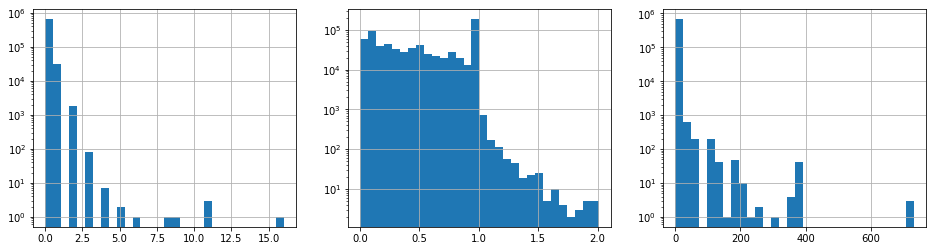

In [27]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(16, 4))

df["ClaimNb"].hist(bins=30, log=True, ax=ax0)

df["Exposure"].hist(bins=30, log=True, ax=ax1)

df["Frequency"].hist(bins=30, log=True, ax=ax2)

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [39]:
log_scale_transformer = make_pipeline(
    FunctionTransformer(np.log, validate=False), StandardScaler()
)

print('>>> pipeline =', log_scale_transformer)

>>> pipeline = Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<ufunc 'log'>)),
                ('standardscaler', StandardScaler())])


In [40]:
linear_model_preprocessor = ColumnTransformer(
    [
        ("passthrough_numeric", "passthrough", ["BonusMalus"]),
        ("binned_numeric", KBinsDiscretizer(n_bins=10), ["VehAge", "DrivAge"]),
        ("log_scaled_numeric", log_scale_transformer, ["Density"]),
        (
            "onehot_categorical",
            OneHotEncoder(),
            ["VehBrand", "VehPower", "VehGas", "Region", "Area"],
        ),
    ],
    remainder="drop",
)

print('>>> pipeline =', linear_model_preprocessor)

>>> pipeline = ColumnTransformer(transformers=[('passthrough_numeric', 'passthrough',
                                 ['BonusMalus']),
                                ('binned_numeric', KBinsDiscretizer(n_bins=10),
                                 ['VehAge', 'DrivAge']),
                                ('log_scaled_numeric',
                                 Pipeline(steps=[('functiontransformer',
                                                  FunctionTransformer(func=<ufunc 'log'>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Density']),
                                ('onehot_categorical', OneHotEncoder(),
                                 ['VehBrand', 'VehPower', 'VehGas', 'Region',
                                  'Area'])])
